## 1.6 Keras Project : Student Admission

### Project Flow:  
1. Data loading and processing
2. Define model architecture  
3. Model training and performance tracking  

__Notes:__  
This one uses same data as 1.3  

In [3]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

In [88]:
# helper function for 1.6
def one_hot_encoding(data, dummy_list):
    for field in dummy_list:
        data = pd.get_dummies(data, columns=[field])
    return data

def standadize(data, fields):
    for field in fields:
        mean, std = data[field].mean(), data[field].std()
        data.loc[:,field] = (data[field]-mean)/std
    return data

def train_test_split(data, train_ratio):
    sample = np.random.choice(data.index, size=int(len(data)*train_ratio), replace=False)
    train, test = data.iloc[sample], data.drop(sample)
    return train, test

def feature_target_split(data, target):
    features = data.drop(target, axis=1).values
    targets = data[target].values
    return features, targets

In [15]:
# 1. data importing and processing, same as 1.3, except target needs one hot encoding as well
data1_3 = pd.read_csv("..\\ClassSampleData\\Data1.3_student_data.csv")
one_hot_data = one_hot_encoding(data1_3, ['rank'])
one_hot_data = standadize(one_hot_data, ['gre', 'gpa'])
np.random.seed(21)    
Train, Test = train_test_split(one_hot_data, 0.9)
features, targets = feature_target_split(Train, 'admit')
features_test, targets_test = feature_target_split(Test, 'admit')

# in keras, target field needs one hot encoding as well
targets = np.array(keras.utils.to_categorical(targets, 2))
targets_test = np.array(keras.utils.to_categorical(targets_test, 2))


In [16]:
# 2. build model architecture
# Building the model
model = Sequential()
model.add(Dense(128, activation='sigmoid', input_shape=(6,)))
model.add(Dropout(.2))
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(.1))
model.add(Dense(2, activation='softmax'))

# Compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               896       
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 130       
Total params: 9,282
Trainable params: 9,282
Non-trainable params: 0
_________________________________________________________________


In [17]:
# 3. model training and performance tracking
# Training
model.fit(features, targets, epochs=200, batch_size=100, verbose=0)
# Evaluating the model on the training and testing set
score = model.evaluate(features, targets)
print("\n Training Accuracy:", score[1])
score = model.evaluate(features_test, targets_test)
print("\n Testing Accuracy:", score[1])

Instructions for updating:
Use tf.cast instead.
360/360 [==============================] - 0s 197us/step

 Training Accuracy: 0.6916666666666667
40/40 [==============================] - 0s 75us/step

 Testing Accuracy: 0.7


## 1.7 Keras Project (TEXT) : IMDB Review

### Project Flow:  
1. Data loading from keras
2. Data processing
3. Define model architecture  
4. Model training and performance tracking  

__Notes:__
Data used for this are from keras preload

In [18]:
import numpy as np
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

In [37]:
# 1. Load data from keras, added extra codes to bypass all_pickle error
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=1000, skip_top=2)

# restore np.load for future normal usage
np.load = np_load_old

In [38]:
# 2. Data processing

# Predictive attributes
# one hot encoding to convert the word index to binary
# hence each record will be 1000 long binary vector
tokenizer = Tokenizer(num_words=1000)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')

# Target attributes
num_classes = 2
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [47]:
# 3. Modeling
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(1000,)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(2, activation='softmax'))

# Compiling the model using categorical_crossentropy loss, and rmsprop optimizer.
model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 128)               128128    
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 130       
Total params: 136,514
Trainable params: 136,514
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=1)
score = model.evaluate(x_test, y_test, verbose=0)
score

Epoch 1/10
25000/25000 [==============================] - 1s 55us/step - loss: 0.4077 - acc: 0.8136
Epoch 2/10
25000/25000 [==============================] - 1s 40us/step - loss: 0.3086 - acc: 0.8696
Epoch 3/10
25000/25000 [==============================] - 1s 40us/step - loss: 0.2689 - acc: 0.8898
Epoch 4/10
25000/25000 [==============================] - 1s 40us/step - loss: 0.2170 - acc: 0.9150
Epoch 5/10
25000/25000 [==============================] - 1s 39us/step - loss: 0.1523 - acc: 0.9436
Epoch 6/10
25000/25000 [==============================] - 1s 39us/step - loss: 0.0973 - acc: 0.9652
Epoch 7/10
25000/25000 [==============================] - 1s 39us/step - loss: 0.0697 - acc: 0.9746
Epoch 8/10
25000/25000 [==============================] - 1s 39us/step - loss: 0.0525 - acc: 0.9819
Epoch 9/10
25000/25000 [==============================] - 1s 41us/step - loss: 0.0472 - acc: 0.9825
Epoch 10/10
25000/25000 [==============================] - 1s 39us/step - loss: 0.0364 - acc: 0.9873

[0.7024720251226425, 0.84316]

## 1.8 Tensor Flow Project (IMAGE): notMNIST

### Project Flow  
__Data Prep__  
1. File downloading
2. Uncompress zipped file and grab a sample
3. Process image data: standadize pixle value and one hot encoding target letters
4. Save processed data for next stages  

__Model__  
5. Load saved data
6. Set up netowrks - no hidden layer as intro projects
7. Model training and tracking
8. Check test performance

In [49]:
import hashlib
import os
import pickle
from urllib.request import urlretrieve

import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import resample
from tqdm import tqdm
from zipfile import ZipFile

In [51]:
# 1. File downloading
def download(url, file):
    if not os.path.isfile(file):
        print('Downloading ' + file + '...')
        urlretrieve(url, file)
        print('Download Finished')

# Download the training and test dataset.
download('https://s3.amazonaws.com/udacity-sdc/notMNIST_train.zip', '..\\ClassSampleData\\notMNIST_train.zip')
download('https://s3.amazonaws.com/udacity-sdc/notMNIST_test.zip', '..\\ClassSampleData\\notMNIST_test.zip')

# Make sure the files aren't corrupted
assert hashlib.md5(open('..\\ClassSampleData\\notMNIST_train.zip', 'rb').read()).hexdigest() == 'c8673b3f28f489e9cdf3a3d74e2ac8fa',\
        'notMNIST_train.zip file is corrupted.  Remove the file and try again.'
assert hashlib.md5(open('..\\ClassSampleData\\notMNIST_test.zip', 'rb').read()).hexdigest() == '5d3c7e653e63471c88df796156a9dfa9',\
        'notMNIST_test.zip file is corrupted.  Remove the file and try again.'

In [69]:
# 2. uncompress zip file
def uncompress_features_labels(file):
    features = []
    labels = []

    with ZipFile(file) as zipf:
        # Progress Bar
        filenames_pbar = tqdm(zipf.namelist(), unit='files')
        
        # Get features and labels from all files
        for filename in filenames_pbar:
            # Check if the file is a directory
            if not filename.endswith('/'):
                with zipf.open(filename) as image_file:
                    image = Image.open(image_file)
                    image.load()
                    # Load image data as 1 dimensional array
                    # We're using float32 to save on memory space
                    feature = np.array(image, dtype=np.float32).flatten()

                # Get the the letter from the filename.  This is the letter of the image.
                label = os.path.split(filename)[1][0]

                features.append(feature)
                labels.append(label)
    return np.array(features), np.array(labels)

# Get the features and labels from the zip files
train_features, train_labels = uncompress_features_labels('..\\ClassSampleData\\notMNIST_train.zip')
test_features, test_labels = uncompress_features_labels('..\\ClassSampleData\\notMNIST_test.zip')

# Limit the amount of data to work with a docker container
docker_size_limit = 150000
train_features, train_labels = resample(train_features, train_labels, n_samples=docker_size_limit)

100%|███████████████████████████████████████████████████████████████████████| 10001/10001 [00:01<00:00, 5912.95files/s]


In [81]:
# 3. data processing
# Input: image standadizationn, from 0-255 to 0.1-0.9
def normalize_grayscale(image_data):
    a = 0.1
    b = 0.9
    grayscale_min = 0
    grayscale_max = 255
    return a + ( ( (image_data - grayscale_min)*(b - a) )/( grayscale_max - grayscale_min ) )
    
# Target: one hot encoding
def one_hot(label_data, score_data):
    encoder = LabelBinarizer()
    encoder.fit(label_data)
    labeled = encoder.transform(score_data)
    labeled = labeled.astype(np.float32)
    return labeled


train_X = normalize_grayscale(train_features)
test_X = normalize_grayscale(test_features)

train_Y = one_hot(train_labels, train_labels)
test_Y = one_hot(train_labels, test_labels)

# Split out validation datasets
train_X, valid_X, train_Y, valid_Y = train_test_split(train_X, train_Y, test_size=0.05, random_state=832289)

In [87]:
# 4. Save processed data for later access
pickle_file = '..\\ClassSampleData\\notMNIST.pickle'
if not os.path.isfile(pickle_file):
    print('Saving data to pickle file...')
    try:
        with open('..\\ClassSampleData\\notMNIST.pickle', 'wb') as pfile:
            pickle.dump(
                {
                    'train_dataset': train_X,
                    'train_labels': train_Y,
                    'valid_dataset': valid_X,
                    'valid_labels': valid_Y,
                    'test_dataset': test_X,
                    'test_labels': test_Y,
                },
                pfile, pickle.HIGHEST_PROTOCOL)
    except Exception as e:
        print('Unable to save data to', pickle_file, ':', e)
        raise

Saving data to pickle file...


In [1]:
# 5. Load saved data and packages for models
%matplotlib inline

import pickle
import math
import numpy as np
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt

# Reload the data
pickle_file = '..\\ClassSampleData\\notMNIST.pickle'
with open(pickle_file, 'rb') as f:
  pickle_data = pickle.load(f)
  train_X = pickle_data['train_dataset']
  train_Y = pickle_data['train_labels']
  valid_X = pickle_data['valid_dataset']
  valid_Y = pickle_data['valid_labels']
  test_X = pickle_data['test_dataset']
  test_Y = pickle_data['test_labels']
  del pickle_data  # Free up memory

In [6]:
# 6. Set up network parameter, no hidden layer
# features is pixles count 28*28
features_count = 784
labels_count = 10

features = tf.placeholder(tf.float32)
labels = tf.placeholder(tf.float32)

weights = tf.Variable(tf.truncated_normal((features_count, labels_count)))
biases = tf.Variable(tf.zeros(labels_count))

logits = tf.matmul(features, weights) + biases
prediction = tf.nn.softmax(logits)
cross_entropy = -tf.reduce_sum(labels * tf.log(prediction), reduction_indices=1)
loss = tf.reduce_mean(cross_entropy)

train_feed_dict={features: train_X, labels: train_Y}
valid_feed_dict={features: valid_X, labels: valid_Y}
test_feed_dict={features: test_X, labels: test_Y}

is_correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(labels, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct_prediction, tf.float32))

Epoch  5/5: 100%|████████████████████████████████████████████████████████████| 1114/1114 [00:09<00:00, 123.38batches/s]


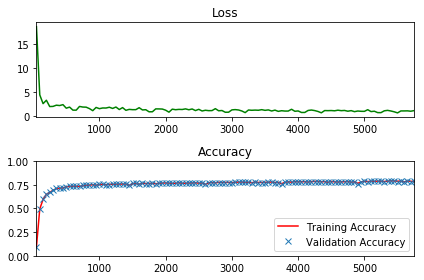

Validation accuracy at 0.7809333205223083


In [13]:
# 7. model training

batch_size = 128
epochs = 5
learning_rate = 0.2

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)   

# The accuracy measured against the validation set
validation_accuracy = 0.0

# Measurements use for graphing loss and accuracy
log_batch_step = 50
batches = []
loss_batch = []
train_acc_batch = []
valid_acc_batch = []

with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    batch_count = int(math.ceil(len(train_X)/batch_size))

    for epoch_i in range(epochs):
        
        # Progress bar
        batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(epoch_i+1, epochs), unit='batches')
        
        # The training cycle
        for batch_i in batches_pbar:
            # Get a batch of training features and labels
            batch_start = batch_i*batch_size
            batch_features = train_X[batch_start:batch_start + batch_size]
            batch_labels = train_Y[batch_start:batch_start + batch_size]

            # Run optimizer and get loss
            _, l = session.run(
                [optimizer, loss],
                feed_dict={features: batch_features, labels: batch_labels})

            # Iteration tracking: Log every 50 batches
            if not batch_i % log_batch_step:
                # Calculate Training and Validation accuracy
                training_accuracy = session.run(accuracy, feed_dict=train_feed_dict)
                validation_accuracy = session.run(accuracy, feed_dict=valid_feed_dict)

                # Log batches, loss and accuracy
                previous_batch = batches[-1] if batches else 0
                batches.append(log_batch_step + previous_batch)
                loss_batch.append(l)
                train_acc_batch.append(training_accuracy)
                valid_acc_batch.append(validation_accuracy)

        # Check accuracy against Validation data
        validation_accuracy = session.run(accuracy, feed_dict=valid_feed_dict)

loss_plot = plt.subplot(211)
loss_plot.set_title('Loss')
loss_plot.plot(batches, loss_batch, 'g')
loss_plot.set_xlim([batches[0], batches[-1]])
acc_plot = plt.subplot(212)
acc_plot.set_title('Accuracy')
acc_plot.plot(batches, train_acc_batch, 'r', label='Training Accuracy')
acc_plot.plot(batches, valid_acc_batch, 'x', label='Validation Accuracy')
acc_plot.set_ylim([0, 1.0])
acc_plot.set_xlim([batches[0], batches[-1]])
acc_plot.legend(loc=4)
plt.tight_layout()
plt.show()

print('Validation accuracy at {}'.format(validation_accuracy))

In [14]:
# 8. Check testing performance
test_accuracy = 0.0

with tf.Session() as session:
    
    session.run(tf.global_variables_initializer())
    batch_count = int(math.ceil(len(train_X)/batch_size))

    for epoch_i in range(epochs):
        
        # Progress bar
        batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(epoch_i+1, epochs), unit='batches')
        
        # The training cycle
        for batch_i in batches_pbar:
            # Get a batch of training features and labels
            batch_start = batch_i*batch_size
            batch_features = train_X[batch_start:batch_start + batch_size]
            batch_labels = train_Y[batch_start:batch_start + batch_size]

            # Run optimizer
            _ = session.run(optimizer, feed_dict={features: batch_features, labels: batch_labels})

        # Check accuracy against Test data
        test_accuracy = session.run(accuracy, feed_dict=test_feed_dict)

print('Test Accuracy is {}'.format(test_accuracy))

Epoch  5/5: 100%|████████████████████████████████████████████████████████████| 1114/1114 [00:01<00:00, 799.53batches/s]


Test Accuracy is 0.8518999814987183


## 1.9 Tensor Flow Project (IMAGE) : MLP with MNIST

### 1 Hidden Layer

In [26]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(".", one_hot=True, reshape=False)

import tensorflow as tf

# Parameters
learning_rate = 0.001
training_epochs = 20
batch_size = 128  # Decrease batch size if you don't have enough memory
display_step = 1

n_input = 784  # MNIST data input (img shape: 28*28)
n_classes = 10  # MNIST total classes (0-9 digits)

n_hidden_layer = 256 # layer number of features

# Store layers weight & bias
weights = {
    'hidden_layer': tf.Variable(tf.random_normal([n_input, n_hidden_layer])),
    'out': tf.Variable(tf.random_normal([n_hidden_layer, n_classes]))
}
biases = {
    'hidden_layer': tf.Variable(tf.random_normal([n_hidden_layer])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# tf Graph input
x = tf.placeholder("float", [None, 28, 28, 1])
y = tf.placeholder("float", [None, n_classes])

rate = tf.placeholder(tf.float32)

x_flat = tf.reshape(x, [-1, n_input])

# Hidden layer with RELU activation
layer_1 = tf.add(tf.matmul(x_flat, weights['hidden_layer']), biases['hidden_layer'])
layer_1 = tf.nn.relu(layer_1)
layer_1 = tf.nn.dropout(layer_1, rate=rate)
# Output layer with linear activation
logits = tf.matmul(layer_1, weights['out']) + biases['out']

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    # Training cycle
    for epoch in range(training_epochs):
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y, rate:0.2})
        # Display logs per epoch step
        if epoch % display_step == 0:
            c = sess.run(cost, feed_dict={x: batch_x, y: batch_y, rate:0.2})
            print("Epoch:", '%04d' % (epoch+1), "cost=","{:.9f}".format(c))
    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    # Decrease test_size if you don't have enough memory
    test_size = 256
    print("Accuracy:", accuracy.eval({x: mnist.test.images[:test_size], y: mnist.test.labels[:test_size], rate: 0}))

Extracting .\train-images-idx3-ubyte.gz
Extracting .\train-labels-idx1-ubyte.gz
Extracting .\t10k-images-idx3-ubyte.gz
Extracting .\t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost= 66.464950562
Epoch: 0002 cost= 54.121562958
Epoch: 0003 cost= 33.916511536
Epoch: 0004 cost= 28.449432373
Epoch: 0005 cost= 22.969717026
Epoch: 0006 cost= 17.727844238
Epoch: 0007 cost= 17.979471207
Epoch: 0008 cost= 17.130399704
Epoch: 0009 cost= 16.940496445
Epoch: 0010 cost= 14.917200089
Epoch: 0011 cost= 19.181957245
Epoch: 0012 cost= 9.234926224
Epoch: 0013 cost= 13.740039825
Epoch: 0014 cost= 16.360176086
Epoch: 0015 cost= 13.071282387
Epoch: 0016 cost= 7.663295746
Epoch: 0017 cost= 13.330736160
Epoch: 0018 cost= 15.795780182
Epoch: 0019 cost= 11.494125366
Epoch: 0020 cost= 14.527457237
Optimization Finished!
Accuracy: 0.8828125
